### Temporal Data Exploration 

- Objective: analyze potential seasonal trends or time related patterns that might impact modeling approach
- Using Dataframe Resulting from Data Augmentation Notebook

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

In [2]:
data = pd.read_pickle('data/pickle_files/df_pickle_w_time_stats')

df = data.copy()

In [3]:
df.columns

Index(['cons_conf', 'ind_turnover', 'major_purch_expect',
       'major_purch_opportu', 'unempl_expect', 'inflation_delta_expect',
       'economy_expect', 'economy_past', 'financial_past',
       'savings_delta_expect', 'household_debt_ratio', 'savings_expect',
       'emplmnt_industry_index', 'railway_passengers', 'month', 'year', 'Date',
       'day', 'age', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month_last_contact', 'day_of_week_last_contact',
       'poutcome', 'y'],
      dtype='object')

In [4]:
df.dtypes

cons_conf                          float64
ind_turnover                       float64
major_purch_expect                 float64
major_purch_opportu                float64
unempl_expect                      float64
inflation_delta_expect             float64
economy_expect                     float64
economy_past                       float64
financial_past                     float64
savings_delta_expect               float64
household_debt_ratio               float64
savings_expect                     float64
emplmnt_industry_index             float64
railway_passengers                 float64
month                                int64
year                                 int64
Date                        datetime64[ns]
day                                  int64
age                                  int64
duration                             int64
campaign                             int64
pdays                                int64
previous                             int64
emp.var.rat

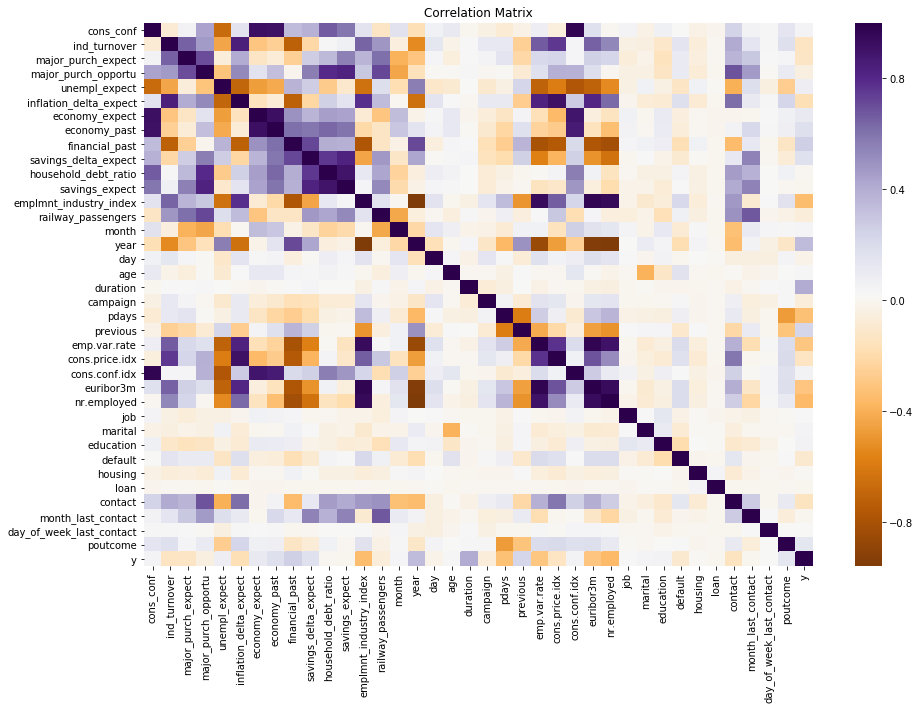

In [5]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, ax=ax, cmap = 'PuOr', cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [101]:
def pointb_corr(df):
    #Correlation between independent features and (binary) target var
    pbcorr_list = []
    for i in df.columns:
        if math.isnan(stats.pointbiserialr(df[i],df['y'])[0]) != True:
            pbcorr_list.append((str(i), stats.pointbiserialr(df[i],df['y'])[0]))
    return pbcorr_list

In [7]:
#pointb_corr(df)
binary_corr = list(map(lambda x: x[0], pointb_corr(df.select_dtypes(exclude=['datetime64[ns]']))))

In [109]:
sorted(pointb_corr(df.select_dtypes(exclude=['datetime64[ns]'])), key=lambda tup: tup[1])

[('nr.employed', -0.354678295921437),
 ('emplmnt_industry_index', -0.3429091128151326),
 ('pdays', -0.32491447761663333),
 ('euribor3m', -0.30777140394072106),
 ('emp.var.rate', -0.29833442615937855),
 ('inflation_delta_expect', -0.17083885451981126),
 ('contact', -0.14477305571200072),
 ('ind_turnover', -0.13926897737238075),
 ('cons.price.idx', -0.13621121281924775),
 ('major_purch_expect', -0.1281023783432132),
 ('default', -0.09935179776148562),
 ('railway_passengers', -0.06651684062255724),
 ('campaign', -0.0663574147546709),
 ('major_purch_opportu', -0.045329358390171645),
 ('day', -0.022839722384317262),
 ('month_last_contact', -0.006064777585807265),
 ('savings_expect', -0.00518326491501758),
 ('loan', -0.004908593276454147),
 ('household_debt_ratio', 0.00135669624360547),
 ('housing', 0.0115516863895271),
 ('day_of_week_last_contact', 0.015967189827114394),
 ('job', 0.025122169918406805),
 ('age', 0.030398803040003714),
 ('month', 0.036856117393932755),
 ('marital', 0.04620260

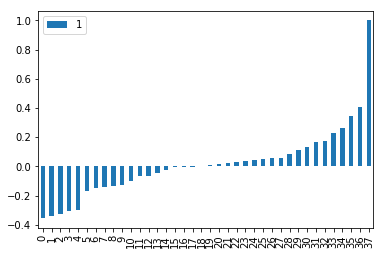

In [110]:
#fig, ax = plt.subplots(figsize=(15,10))

pd.DataFrame(sorted(pointb_corr(df.select_dtypes(exclude=['datetime64[ns]'])), key=lambda tup: tup[1])).plot(kind='bar')

#sns.barplot(x = list(map(lambda x: x[0], binary_corr)), 
#            y = list(map(lambda x: x[1], binary_corr)), 
#            ax = ax)

#ax.set_xticklabels(np.arange(12), list(map(lambda x: x[0], pbcorr_list)), rotation=90)
#ax.set_title("Correlation Between Features and Y")
plt.show()

/Users/pauldefusco/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


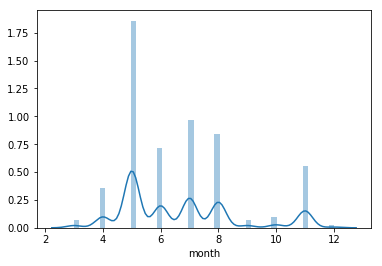

In [9]:
#Total distribution of calls:
sns.distplot(df.month)

/Users/pauldefusco/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


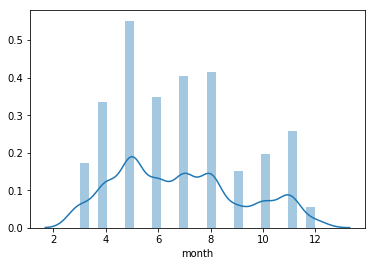

In [10]:
#Successes:
sns.distplot(df[df.y==1].month)

/Users/pauldefusco/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


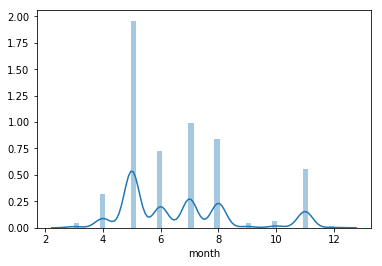

In [11]:
#Failures:
sns.distplot(df[df.y==0].month)

/Users/pauldefusco/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


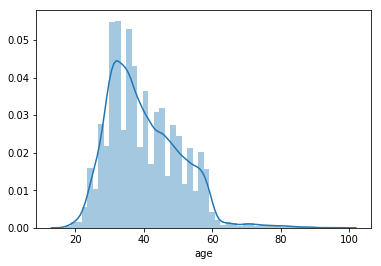

In [12]:
sns.distplot(df.age)

/Users/pauldefusco/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


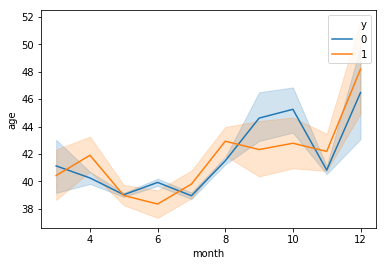

In [13]:
#Age as a function of  time:
sns.lineplot(x="month", y="age",
             hue="y",
             data=df)

/Users/pauldefusco/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


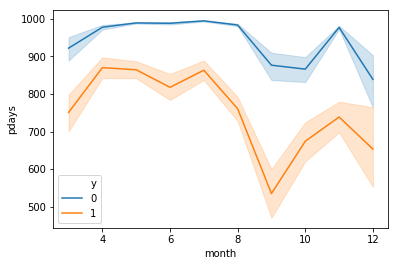

In [14]:
#pdays as a function of time:
sns.lineplot(x="month", y="pdays",
             hue="y",
             data=df)

/Users/pauldefusco/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


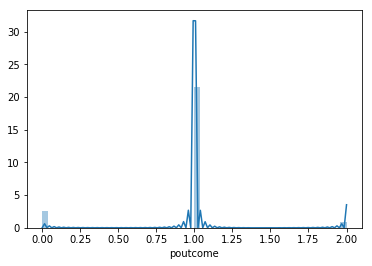

In [15]:
sns.distplot(df.poutcome)

/Users/pauldefusco/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


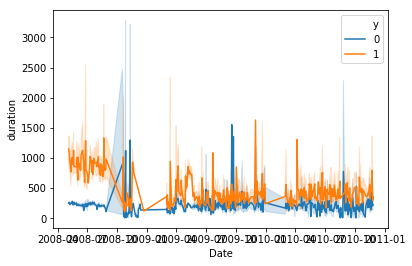

In [24]:
#pdays as a function of time with previous outcome as hue:
sns.lineplot(x="Date", y="duration",
             hue="y",
             data=df)

In [17]:
eco_stats = [
    'cons_conf'                          
    ,'economy_expect'                       
    ,'major_purch_expect'                 
    ,'major_purch_opportu'                
    ,'unempl_expect'                      
    ,'inflation_delta_expect'             
    ,'economy_expect'                     
    ,'economy_past'                       
    ,'financial_past'                     
    ,'savings_delta_expect'               
    ,'household_debt_ratio'               
    ,'savings_expect'                     
    ,'emplmnt_industry_index'             
    ,'railway_passengers'
    ]

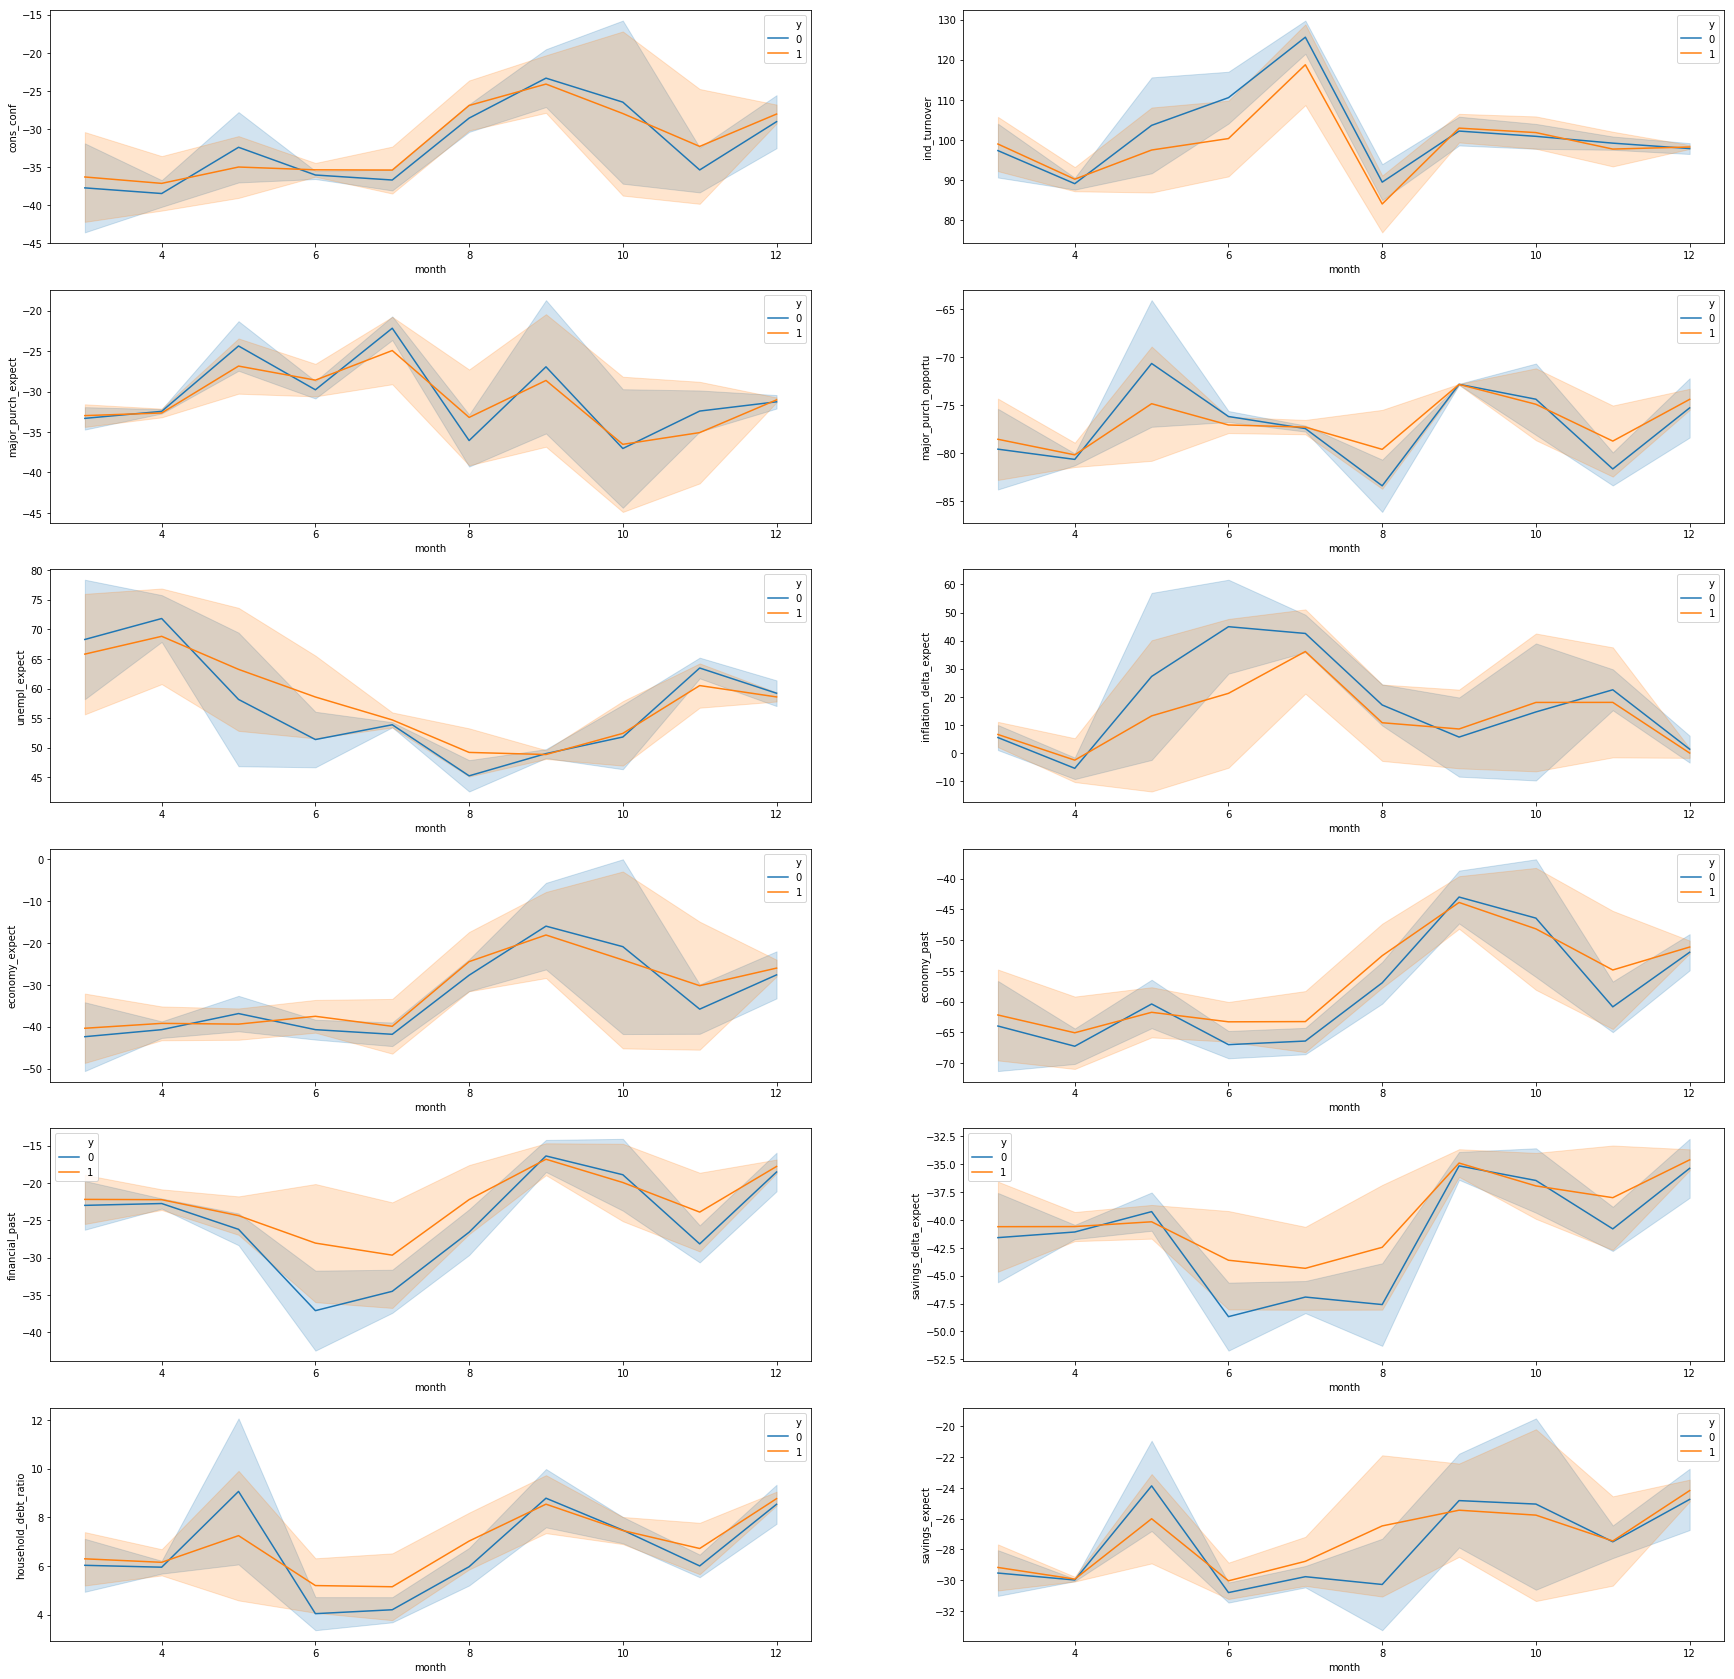

In [97]:
fig, axes = plt.subplots(6,2, sharex=False, sharey=False, figsize=(30,30), squeeze=False)

for ax, feature in zip(axes.flat, eco_stats):
    
    sns.lineplot(x="month", y=feature,
                hue="y",
                data=df,
                ci="sd",
                ax=ax)

plt.show()

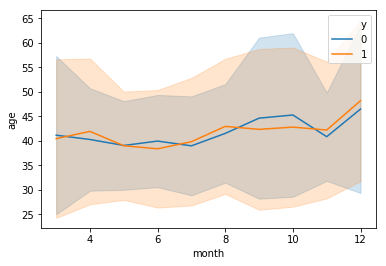

In [96]:
sns.lineplot(x="month", y='age',
             hue="y",
             data=df,
             ci="sd")

In [90]:
temp_df_avg = df.groupby(by=['month','y'])['age'].mean()
temp_df_stdev = df.groupby(by=['month','y'])['age'].std()

In [91]:
temp_df_avg = temp_df_avg.unstack()
temp_df_stdev = temp_df_stdev.unstack()

In [92]:
temp_df_avg.columns = ['No', 'Yes']
temp_df_stdev.columns = ['No', 'Yes']

In [93]:
temp_df_avg.reset_index(drop=0, inplace=True)
temp_df_stdev.reset_index(drop=0, inplace=True)

In [94]:
temp_df_stdev

,month,No,Yes
0,3,16.172077,16.193118
1,4,10.468056,14.883597
2,5,9.051100,11.067413
3,6,9.420690,12.010184
4,7,10.107515,13.029817
5,8,10.064695,13.800159
6,9,16.449695,16.417824
7,10,16.703492,16.259375
8,11,9.028330,13.963582
9,12,17.153141,16.429299


TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

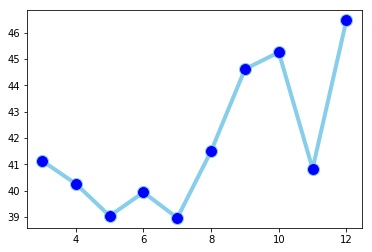

In [95]:
plt.plot('month', 'No', data=temp_df_avg, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot('month', 'No'+temp_df_stdev.No, data=temp_df_avg, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=1)
#plt.plot('month', 'No', data=temp_df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=1)

#plt.plot('month', 'Yes', data=temp_df, marker='', color='olive', linewidth=4)
#plt.plot('month', 'Yes', data=temp_df, marker='', color='olive', linewidth=1)
#plt.plot('month', 'Yes', data=temp_df, marker='', color='olive', linewidth=1)